In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:

from google.colab import files


uploaded = files.upload()

Saving tesla-stock-price.csv to tesla-stock-price.csv


In [6]:
# Step 1: Data Preprocessing
data = pd.read_csv('tesla-stock-price.csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

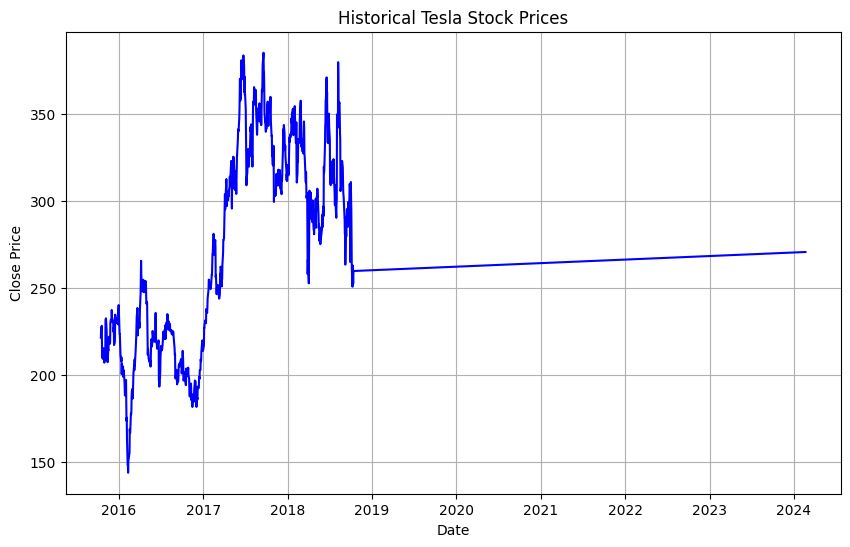

In [8]:
# Step 2: Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['close'], color='blue')
plt.title('Historical Tesla Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

In [10]:
# Step 3: Model Development
train_data = data['close'][:-30]  # Use data up to last 30 days for training
test_data = data['close'][-30:]   # Use last 30 days for testing

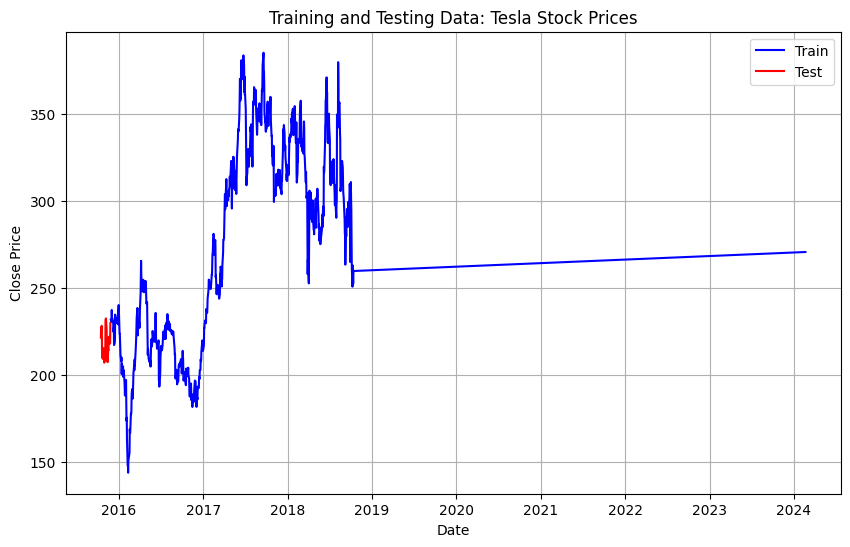

In [15]:
# Visualize Training and Testing Data on Single Graph
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data.values, color='blue', label='Train')
plt.plot(test_data.index, test_data.values, color='red', label='Test')
plt.title('Training and Testing Data: Tesla Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
# Fit ARIMA model
model = ARIMA(train_data, order=(5,1,0))
result = model.fit()
print(result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  727
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2515.165
Date:                Mon, 19 Feb 2024   AIC                           5042.330
Time:                        14:42:29   BIC                           5069.855
Sample:                             0   HQIC                          5052.952
                                - 727                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0311      0.028     -1.123      0.261      -0.085       0.023
ar.L2          0.0065      0.036      0.181      0.857      -0.064       0.077
ar.L3          0.0500      0.025      1.976      0.0

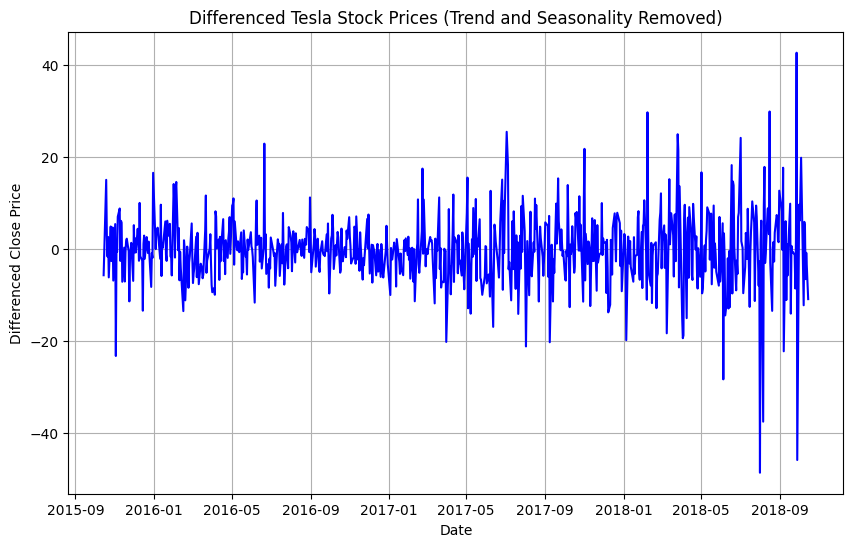

In [16]:
# Step 2: Differencing to Remove Trend and Seasonality
# First-order differencing to remove trend
diff_data = data['close'].diff()

# Seasonal differencing if needed (for example, for monthly or yearly seasonality)

# Step 3: Visualization
plt.figure(figsize=(10, 6))
plt.plot(diff_data.index, diff_data.values, color='blue')
plt.title('Differenced Tesla Stock Prices (Trend and Seasonality Removed)')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.grid(True)
plt.show()

In [12]:
# Step 4: Evaluation
predictions = result.forecast(steps=len(test_data))
mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 15.672201092032543


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


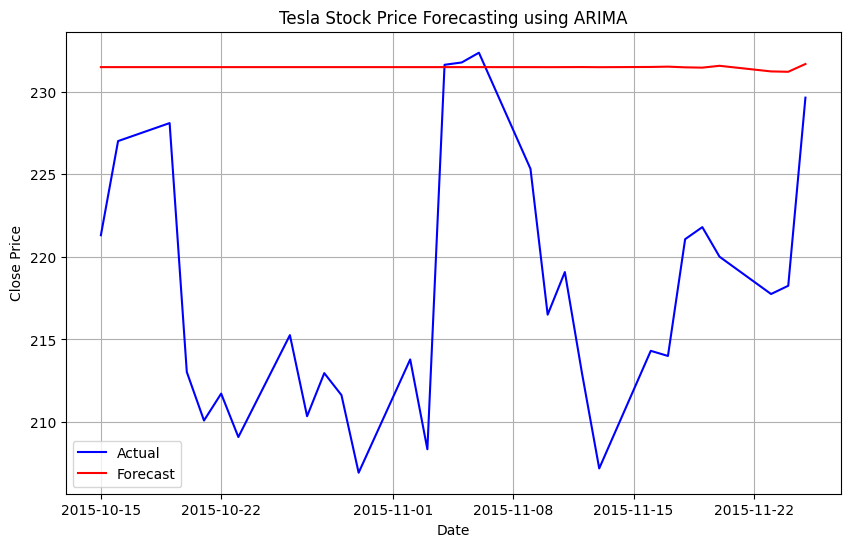

In [13]:
# Step 5: Forecasting
plt.figure(figsize=(10, 6))
plt.plot(data.index[-30:], test_data, color='blue', label='Actual')
plt.plot(data.index[-30:], predictions, color='red', label='Forecast')
plt.title('Tesla Stock Price Forecasting using ARIMA')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()